In [67]:
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

In [68]:
with open('second-pickle.pickle', 'rb') as f:
     df1,df2,df3 = pickle.load(f)

In [69]:
df1

['I-30 E',
 'I-35E S',
 'Warren Pkwy',
 'I-820 E',
 'Sutter St',
 'US-67 S',
 'I-20 W',
 'University Dr',
 'US-75 N',
 'Dallas North Tollway N',
 'FM 423',
 'Exit 29: President George Bush Tpk N',
 'I-35W N',
 'Exit 18: Oakland Blvd',
 'US-75 S',
 'SH-183 W',
 'I-635 W',
 'SH-360 S',
 'I-20 E',
 'to I-635 E',
 'N Henderson Ave',
 'I-35E N',
 'US-80 W',
 'US-287 S',
 'I-30 W',
 'Cimarron Trl',
 'Loop 12 S',
 'I-635 E',
 'Cupertino Trl',
 'W Northwest Hwy',
 'Elm St',
 'North Texas Blvd',
 'Eldorado Pkwy',
 'Circle Ln',
 'N Stemmons Fwy',
 nan,
 'Coit Rd',
 'Continental Ave',
 'I-35 N',
 'Meadowview Dr',
 'Sunrise Dr',
 'W Hebron Pkwy',
 'Young St',
 'Allen St',
 'Rendon New Hope Rd',
 'US-80 E',
 'W Lawther Dr',
 'Morton St',
 'Exit 54A: SH-183 / NE 28th St E',
 'W Rosedale St',
 'Willis Ave',
 'Lamar St',
 'Forest Park Blvd',
 'to Montfort Dr',
 'French Wood Dr',
 'E Trinity Mills Rd',
 'E Pioneer Pkwy',
 'to US-75 S',
 'SH-114',
 'to Oakmont Blvd',
 'Dowdy Ferry Rd',
 'E Belt Line Rd'

In [70]:
df3

,FACILITY_NAME,EVENT_TYPE,time
0,1000 Oaks Blvd,slowdown,2019-01-09 10:20:56
1,105th St,traffic jam,2018-11-22 19:52:47
2,105th St,heavy traffic,2018-11-28 17:06:55
3,105th St,heavy traffic,2018-11-28 17:07:27
4,105th St,traffic jam,2018-11-29 23:24:52
...,...,...,...
3057780,to Zang Blvd N,traffic heavier than normal,2018-12-06 07:50:24
3057781,to Zang Blvd N,heavy traffic,2018-12-14 16:48:31
3057782,to Zang Blvd N,heavy traffic,2019-01-24 07:53:18
3057783,to Zang Blvd N,heavy traffic,2019-01-31 07:46:35


In [71]:
len(df3[df3['EVENT_TYPE'].isin(['accident','minor accident'])])

49766

In [72]:
len(list(df3[(df3['EVENT_TYPE'].isin(["accident","minor accident"]))].FACILITY_NAME.unique()))

4131

In [73]:
sq=[]
for road in df1:
    temp_df=df3[df3['FACILITY_NAME'] == road]
    time=list(temp_df[(temp_df['EVENT_TYPE'].isin(["accident","minor accident"]))].time)
    for item in time:
        stim= item -timedelta(minutes=30)
        maske = ((temp_df['time'] >= stim) & (temp_df['time'] <= item) & (temp_df['EVENT_TYPE'] != "accident") & (temp_df['EVENT_TYPE'] != "minor accident"))
        dfse=temp_df.loc[maske]
        dfse=dfse.reset_index(drop=True)
        s1=[]
        for i in range(len(dfse)-1):
            s1.append(dfse['EVENT_TYPE'].loc[i])
        sq.append(s1)

KeyboardInterrupt: 

In [ ]:
accident = []

for sequence in sq:
    if len(sequence) != 0:
        accident.append(sequence)

In [ ]:
len(accident)

32220

In [ ]:
df_na = df3[(df3['EVENT_TYPE'] != 'accident') & (df3['EVENT_TYPE'] != 'minor accident')].sample(n=32220, random_state=5)
sq_na=[]
for index in range(len(df_na)):
    road=df_na['FACILITY_NAME'].iloc[index]
    temp_df=df3[df3['FACILITY_NAME'] == road]
    etime_na=df_na['time'].iloc[index]
    stime_na= etime_na -timedelta(minutes=30)
    mask_na = ((temp_df['time'] >= stime_na) & (temp_df['time'] <= etime_na))
    dfuse_na=temp_df.loc[mask_na]
    dfuse_na=dfuse_na.reset_index(drop=True)
    s1=[]
    for i in range(len(dfuse_na)-1):
        s1.append(dfuse_na['EVENT_TYPE'].loc[i])
    sq_na.append(s1)

In [ ]:
not_accident = []

for sequence in sq_na:
    if len(sequence) != 0:
        not_accident.append(sequence)

In [ ]:
dtemp1=pd.DataFrame({'label':1, 'events': accident})
dtemp2 = pd.DataFrame({'label':0, 'events': not_accident})
dtemp1=dtemp1.sample(n=len(dtemp2), random_state=12)
fdf=pd.concat([dtemp1, dtemp2])
fdf.reset_index(inplace=True,drop=True)

In [ ]:
with open('Waze-Data-Sequences.pickle', 'wb') as f:
    pickle.dump( (fdf ), f)

In [ ]:
event_dict={}
for i in range(len(df2)):
    event_dict.update({ i+1 : df2[i]})
event_dict

{1: 'minor accident',
 2: 'other',
 3: 'road closed',
 4: 'stopped car on the shoulder',
 5: 'traffic jam',
 6: 'major event',
 7: 'pothole',
 8: 'missing sign on the shoulder',
 9: 'stopped car',
 10: 'hazard on the shoulder',
 11: 'accident',
 12: 'flooding',
 13: 'road construction',
 14: 'stopped traffic',
 15: 'object on roadway',
 16: 'animal struck',
 17: 'heavy traffic',
 18: 'small traffic jam',
 19: 'slowdown',
 20: 'animal on the shoulder',
 21: 'large traffic jam',
 22: 'traffic heavier than normal',
 23: 'malfunctioning traffic light',
 24: 'medium traffic jam',
 25: 'hazard on road',
 26: 'weather hazard',
 27: 'road closed due to construction',
 28: 'hail',
 29: 'ice on roadway',
 30: 'fog',
 31: 'huge traffic jam',
 32: 'road closed due to hazard'}

In [ ]:
len(dtemp2)

24476

In [ ]:
len(dtemp1)

24476

In [ ]:
max_len_event_id = fdf.events.apply(len).idxmax()
max_len_event = fdf.iloc[max_len_event_id]
maxlen = len(max_len_event.events)

In [ ]:
reversed_dict = {}
for k, v in event_dict.items():
  reversed_dict[v] = k

In [ ]:
reversed_dict

{'minor accident': 1,
 'other': 2,
 'road closed': 3,
 'stopped car on the shoulder': 4,
 'traffic jam': 5,
 'major event': 6,
 'pothole': 7,
 'missing sign on the shoulder': 8,
 'stopped car': 9,
 'hazard on the shoulder': 10,
 'accident': 11,
 'flooding': 12,
 'road construction': 13,
 'stopped traffic': 14,
 'object on roadway': 15,
 'animal struck': 16,
 'heavy traffic': 17,
 'small traffic jam': 18,
 'slowdown': 19,
 'animal on the shoulder': 20,
 'large traffic jam': 21,
 'traffic heavier than normal': 22,
 'malfunctioning traffic light': 23,
 'medium traffic jam': 24,
 'hazard on road': 25,
 'weather hazard': 26,
 'road closed due to construction': 27,
 'hail': 28,
 'ice on roadway': 29,
 'fog': 30,
 'huge traffic jam': 31,
 'road closed due to hazard': 32}

In [ ]:
def event_list_to_index(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

In [ ]:
from keras.preprocessing.sequence import pad_sequences
fdf.events.apply(event_list_to_index)

0              [4, 15, 4, 4, 17, 15, 9, 30, 17, 17, 17, 5]
1        [5, 5, 14, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...
2                                              [22, 22, 5]
3            [4, 17, 5, 5, 4, 4, 4, 5, 5, 14, 5, 5, 4, 19]
4        [17, 17, 22, 17, 17, 13, 15, 4, 14, 14, 17, 17...
                               ...                        
48947                                                  [5]
48948    [5, 5, 4, 4, 17, 17, 4, 4, 17, 17, 19, 19, 17,...
48949                                      [5, 5, 5, 5, 5]
48950                                            [5, 5, 5]
48951                                               [5, 5]
Name: events, Length: 48952, dtype: object

In [ ]:
sequences = fdf.events.apply(event_list_to_index).tolist()
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.array(fdf.label)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [ ]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [ ]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [ ]:
num_events = len(event_dict) + 1
embedding_dim = 20
embedding_matrix = np.random.rand(num_events, embedding_dim)

i use a sequential model as it is good for things hannaning in sequence like stock, words,traffic jam...
i use Long short term memory which is is a type of recurrent neural network (RNN) that is well-suited to learn from experience to classify, process, and predict time series when there are time lags of unknown duration between important events. 
there are 32 nurons
Dropout is a regularization technique used to prevent overfitting in neural networks. By setting dropout=0.5, it randomly drops 50% of the input units (setting them to 0) during the training process.
This is similar to the regular dropout, but it is applied to the recurrent connections of the LSTM. It randomly drops 50% of the recurrent units (the connections between LSTM cells) during training. This form of dropout is specifically designed for recurrent networks as it helps in preventing overfitting

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))


model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))
model.save("traffic.h5")

Epoch 1/20
77/77 [==============================] - 42s 523ms/step - loss: 0.6608 - acc: 0.6108 - val_loss: 0.6417 - val_acc: 0.6366
Epoch 2/20
77/77 [==============================] - 41s 538ms/step - loss: 0.6434 - acc: 0.6395 - val_loss: 0.6371 - val_acc: 0.6437
Epoch 3/20
77/77 [==============================] - 41s 529ms/step - loss: 0.6360 - acc: 0.6475 - val_loss: 0.6323 - val_acc: 0.6475
Epoch 4/20
77/77 [==============================] - 40s 526ms/step - loss: 0.6321 - acc: 0.6525 - val_loss: 0.6252 - val_acc: 0.6539
Epoch 5/20
77/77 [==============================] - 43s 553ms/step - loss: 0.6263 - acc: 0.6564 - val_loss: 0.6196 - val_acc: 0.6575
Epoch 6/20
77/77 [==============================] - 42s 550ms/step - loss: 0.6221 - acc: 0.6618 - val_loss: 0.6126 - val_acc: 0.6688
Epoch 7/20
77/77 [==============================] - 41s 533ms/step - loss: 0.6132 - acc: 0.6726 - val_loss: 0.5979 - val_acc: 0.6850
Epoch 8/20
77/77 [==============================] - 41s 530ms/step - 

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


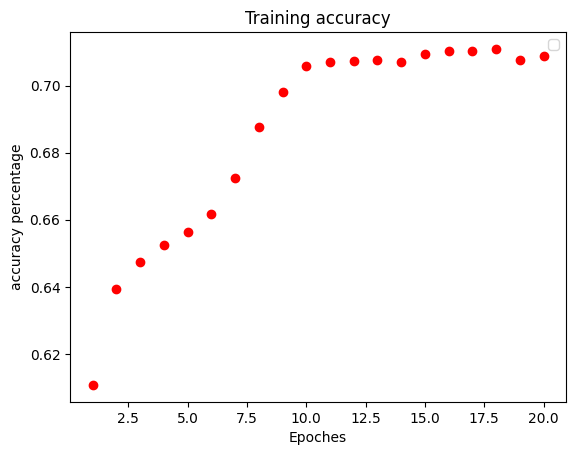

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro')
plt.title('Training accuracy')
plt.legend()
plt.xlabel('Epoches')
plt.ylabel('accuracy percentage')

plt.show()

In [ ]:
sample = data[440:460]
for s in sample:
    seq = []
    for x in s:
        if x!=0:
            seq.append(event_dict[x])
    print(seq)
labels[440:460]

['traffic heavier than normal', 'road construction']
['object on roadway', 'road construction']
['stopped traffic', 'stopped traffic', 'stopped traffic', 'stopped traffic', 'object on roadway', 'object on roadway', 'heavy traffic', 'minor accident', 'heavy traffic', 'minor accident', 'traffic jam', 'traffic jam', 'traffic jam', 'traffic jam', 'medium traffic jam', 'medium traffic jam', 'stopped car on the shoulder', 'stopped car on the shoulder', 'stopped car on the shoulder', 'stopped car on the shoulder', 'stopped traffic', 'stopped traffic', 'traffic jam', 'traffic jam', 'heavy traffic', 'heavy traffic', 'stopped traffic', 'stopped traffic', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'stopped traffic', 'stopped traffic', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'object on roadway', 'object on roadway', 'heavy traffic', 'heavy traffic', 'pothole', 'pothole', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'stoppe

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [ ]:
from keras.models import load_model
predictions = model.predict(sample)
predictions

1/1 [==============================] - 0s 159ms/step


array([[0.38349172],
       [0.39693505],
       [0.00133033],
       [0.8029399 ],
       [0.40466657],
       [0.8038913 ],
       [0.34854183],
       [0.24926993],
       [0.0015566 ],
       [0.6001041 ],
       [0.57089436],
       [0.75185066],
       [0.6050582 ],
       [0.34725842],
       [0.22249393],
       [0.62506086],
       [0.06308588],
       [0.40086558],
       [0.5086434 ],
       [0.7643833 ]], dtype=float32)

In [102]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("traffic.h5")

# Function to calculate permutation feature importance
def permutation_importance(model, X_valid, y_valid, metric, seed=None):
    # Store the original model performance
    original_performance = metric(y_valid, model.predict(X_valid).round())

    # Initialize array to store importances
    importances = np.zeros(X_valid.shape[1])

    for i in range(X_valid.shape[1]-20,X_valid.shape[1]):
        # Save the original column
        original_column = X_valid[:, i].copy()

        # Permute the column
        np.random.seed(seed)
        X_valid[:, i] = np.random.permutation(X_valid[:, i])

        # Calculate new performance metric
        new_performance = metric(y_valid, model.predict(X_valid).round())

        # Restore the original data
        X_valid[:, i] = original_column

        # Store the importance (performance decrease)
        importances[i] = original_performance - new_performance

    return importances

feature_importances = permutation_importance(model, X_train, y_train, accuracy_score)


 345/1224 [=======>......................] - ETA: 15s

KeyboardInterrupt: 

In [85]:
# Print feature importances
for i, imp in enumerate(feature_importances):
    print(f"Feature {i}: Importance {imp}")

Feature 0: Importance 0.0
Feature 1: Importance 0.0
Feature 2: Importance 0.0
Feature 3: Importance 0.0
Feature 4: Importance 0.0
Feature 5: Importance 0.0
Feature 6: Importance 0.0
Feature 7: Importance 0.0
Feature 8: Importance 0.0
Feature 9: Importance 0.0
Feature 10: Importance 0.0
Feature 11: Importance 0.0
Feature 12: Importance 0.0
Feature 13: Importance 0.0
Feature 14: Importance 0.0
Feature 15: Importance 0.0
Feature 16: Importance 0.0
Feature 17: Importance 0.0
Feature 18: Importance 0.0
Feature 19: Importance 0.0
Feature 20: Importance 0.0
Feature 21: Importance 0.0
Feature 22: Importance 0.0
Feature 23: Importance 0.0
Feature 24: Importance 0.0
Feature 25: Importance 0.0
Feature 26: Importance 0.0
Feature 27: Importance 0.0
Feature 28: Importance 0.0
Feature 29: Importance 0.0
Feature 30: Importance 0.0
Feature 31: Importance 0.0
Feature 32: Importance 0.0
Feature 33: Importance 0.0
Feature 34: Importance 0.0
Feature 35: Importance 0.0
Feature 36: Importance 0.0
Feature 37:

In [81]:
for x in X_valid[294]:
        if x!=0:
                seq.append(event_dict[x])
print(seq)

['stopped traffic', 'heavy traffic', 'stopped car on the shoulder', 'stopped traffic', 'heavy traffic', 'heavy traffic', 'stopped traffic', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'heavy traffic', 'stopped traffic', 'stopped car on the shoulder', 'heavy traffic', 'heavy traffic', 'slowdown', 'stopped car on the shoulder', 'heavy traffic', 'heavy traffic', 'traffic jam', 'traffic jam', 'heavy traffic']


In [90]:
for s in X_valid[:,293:]:
    seq = []
    for x in s:
        if x!=0:
            seq.append(event_dict[x])
    print(seq)

['heavy traffic', 'slowdown']
['heavy traffic', 'heavy traffic']
['stopped traffic', 'traffic jam']
['object on roadway', 'stopped car on the shoulder']
['slowdown', 'stopped car on the shoulder']
['traffic jam']
['stopped traffic', 'medium traffic jam']
['traffic jam', 'small traffic jam']
['stopped traffic', 'traffic jam']
['heavy traffic', 'traffic jam']
['stopped car on the shoulder', 'object on roadway']
['stopped traffic', 'traffic jam']
['traffic jam']
['traffic jam']
['stopped car on the shoulder']
['stopped car on the shoulder', 'heavy traffic']
['stopped car on the shoulder']
['traffic jam', 'traffic jam']
['stopped car on the shoulder', 'slowdown']
['stopped car on the shoulder', 'traffic heavier than normal']
['traffic jam', 'traffic jam']
['stopped car on the shoulder']
['small traffic jam', 'accident']
['major event']
['traffic jam']
['slowdown', 'traffic jam']
['stopped car on the shoulder', 'stopped traffic']
['stopped car on the shoulder', 'heavy traffic']
['heavy traf

In [91]:
X_valid

array([[ 0,  0,  0, ..., 22, 17, 19],
       [ 0,  0,  0, ..., 14, 17, 17],
       [ 0,  0,  0, ..., 17, 14,  5],
       ...,
       [ 0,  0,  0, ...,  4,  4, 14],
       [ 0,  0,  0, ...,  5,  5, 17],
       [ 0,  0,  0, ..., 17,  4, 14]])

In [127]:
test = []
for i in range(32):
    for j in range(32):
        test.append([i+1,j+1])
test

[[1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [1, 10],
 [1, 11],
 [1, 12],
 [1, 13],
 [1, 14],
 [1, 15],
 [1, 16],
 [1, 17],
 [1, 18],
 [1, 19],
 [1, 20],
 [1, 21],
 [1, 22],
 [1, 23],
 [1, 24],
 [1, 25],
 [1, 26],
 [1, 27],
 [1, 28],
 [1, 29],
 [1, 30],
 [1, 31],
 [1, 32],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [2, 11],
 [2, 12],
 [2, 13],
 [2, 14],
 [2, 15],
 [2, 16],
 [2, 17],
 [2, 18],
 [2, 19],
 [2, 20],
 [2, 21],
 [2, 22],
 [2, 23],
 [2, 24],
 [2, 25],
 [2, 26],
 [2, 27],
 [2, 28],
 [2, 29],
 [2, 30],
 [2, 31],
 [2, 32],
 [3, 1],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [3, 10],
 [3, 11],
 [3, 12],
 [3, 13],
 [3, 14],
 [3, 15],
 [3, 16],
 [3, 17],
 [3, 18],
 [3, 19],
 [3, 20],
 [3, 21],
 [3, 22],
 [3, 23],
 [3, 24],
 [3, 25],
 [3, 26],
 [3, 27],
 [3, 28],
 [3, 29],
 [3, 30],
 [3, 31],
 [3, 32],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [4, 5],
 [4, 6],
 [4, 7],
 [4,

In [128]:
predictions = model.predict(test)
predictions


32/32 [==============================] - 0s 2ms/step


array([[0.01002659],
       [0.02553846],
       [0.01527304],
       ...,
       [0.44290254],
       [0.36909568],
       [0.40148658]], dtype=float32)

In [153]:
data_df = pd.DataFrame(test,columns=['Event1','Event2'])
labels_df = pd.DataFrame(predictions, columns=['Label'])

result = pd.concat([data_df, labels_df], axis=1)

In [154]:
result =result.sort_values(by='Label', ascending=False)

In [163]:
result = result[(result["Label"]>.7)]

In [164]:
def reversed(x):
    return event_dict[x]

In [165]:
result.Event2.apply(reversed)


165                     major event
168                     stopped car
261                     major event
773                     major event
184                  hazard on road
549                     major event
357                     major event
581                     major event
805                     major event
613                     major event
178                        slowdown
171                        flooding
179          animal on the shoulder
197                     major event
177               small traffic jam
709                     major event
677                     major event
869                     major event
453                     major event
421                     major event
185                  weather hazard
901                     major event
517                     major event
173                 stopped traffic
37                      major event
187                            hail
176                   heavy traffic
133                     majo

In [167]:
result.reset_index(inplace=True, drop=True)

In [189]:
result["Event1"][5]

18

In [196]:
for i in result[:10].index:
    print(f"{event_dict[(result['Event1'][i])]} after {event_dict[result['Event2'][i]]}  has accident probability of {result['Label'][i]}\n")

major event after major event  has accident probability of 0.8558726906776428

major event after stopped car  has accident probability of 0.8047083020210266

stopped car after major event  has accident probability of 0.804496705532074

hazard on road after major event  has accident probability of 0.7984102964401245

major event after hazard on road  has accident probability of 0.7913585305213928

small traffic jam after major event  has accident probability of 0.784466028213501

flooding after major event  has accident probability of 0.782118022441864

slowdown after major event  has accident probability of 0.7811448574066162

weather hazard after major event  has accident probability of 0.781133234500885

animal on the shoulder after major event  has accident probability of 0.7797842621803284



In [195]:
result[:10].index

RangeIndex(start=0, stop=10, step=1)